In [1]:
from os import walk
from PIL import Image
from collections import Counter
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
RANDOM_STATE = 42

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199344 entries, 0 to 199343
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   item_id          199344 non-null  int64 
 1   user_id          199344 non-null  int64 
 2   title            199344 non-null  object
 3   description      199344 non-null  object
 4   image_id         199344 non-null  int64 
 5   actual_date      199344 non-null  object
 6   attribute_id     199344 non-null  int64 
 7   value_id         199344 non-null  int64 
 8   attr_value_name  199344 non-null  object
dtypes: int64(5), object(4)
memory usage: 13.7+ MB


In [5]:
df

item_id        user_id                              title  \
0             1812167        1910951      Дом 210 м² на участке 15 сот.   
1             9500515        2007730       Дача 60 м² на участке 9 сот.   
2         17691258385    16172251111     1-к. квартира, 40 м², 7/14 эт.   
3         23149750057    15617000091   Коттедж 130 м² на участке 6 сот.   
4         25639250154      370435389      Дом 120 м² на участке 30 сот.   
...               ...            ...                                ...   
199339  1683335252073   190937000028  1-к. квартира, 40,1 м², 13/20 эт.   
199340  1694145010714  1017381750025   1-к. квартира, 46,6 м², 9/16 эт.   
199341  1702473000596   257467250082      2-к. квартира, 61 м², 3/9 эт.   
199342  1705007250143   228938750059       Дом 300 м² на участке 5 сот.   
199343  1718569000045    37712250142      1-к. квартира, 35 м², 4/5 эт.   

                                              description     image_id  \
0       Отличный двухэтажный коттедж в живописном мест...    388118650   
1       Продаю дачу в г. Дедовск. СНТ "Малиновка". Ста...    838210529   
2       Сдается квартира на длительный срок от собстве...  19939740083   
3       Комиссия агентства 50%\n\nСдается с мая месяца...   1372975189   
4       Продается новый двухэтажный дом площадью 120 к...    844992705   
...                                                   ...          ...   
199339  Продам шикарную однокомнатную квартиру с ремон...  26799208508   
199340  Продаю квартиру в доме комфорт-класса от финск...  26033762616   
199341  Арт. 57735999 Продаётся прекрасная солнечная д...  26225090194   
199342  Продается трехэтажный кирпичный дом в Верхнем ...  26864972537   
199343  Сдам 1-комнатную кв.35 кв. м.,на 4 этаже 5-ти ...  25956319512   

       actual_date  attribute_id  value_id  attr_value_name  
0       2024-04-26        110710    472002             evro  
1       2023-11-01        110710    472001   kosmeticheskii  
2       2023-07-06        110710    472002             evro  
3       2024-04-17        110710    472002             evro  
4       2023-11-01        110710    472004  trebuet_remonta  
...            ...           ...       ...              ...  
199339  2024-04-09        110710    472002             evro  
199340  2024-03-12        110710    472002             evro  
199341  2024-04-16        110710    472004  trebuet_remonta  
199342  2024-04-11        110710    472002             evro  
199343  2024-04-03        110710    472001   kosmeticheskii  

[199344 rows x 9 columns]

In [6]:
df['item_id'].nunique()

199344

In [7]:
df['user_id'].nunique()

114683

# Какие есть категории

In [8]:
df['attr_value_name'].value_counts(dropna=False)

attr_value_name
kosmeticheskii     92614
evro               49493
trebuet_remonta    37915
dizainerskii       19322
Name: count, dtype: int64

# title

In [9]:
df['title'].apply(len).describe()

count    199344.000000
mean         30.305357
std           1.822691
min           8.000000
25%          29.000000
50%          30.000000
75%          31.000000
max          53.000000
Name: title, dtype: float64

In [10]:
title_lists = df['title'].apply(lambda x: x.split(' ')).values
title_words = [word for title_list in title_lists for word in title_list]

Counter(title_words).most_common(25)

[('квартира,', 131305),
 ('1-к.', 54587),
 ('на', 51250),
 ('участке', 51250),
 ('2-к.', 49593),
 ('Дом', 39422),
 ('3-к.', 24519),
 ('Квартира-студия,', 12877),
 ('5/5\xa0эт.', 8847),
 ('4/5\xa0эт.', 7728),
 ('3/5\xa0эт.', 7583),
 ('2/5\xa0эт.', 7429),
 ('Дача', 7253),
 ('1/5\xa0эт.', 7077),
 ('6\xa0сот.', 6216),
 ('10\xa0сот.', 4120),
 ('4-к.', 3737),
 ('40\xa0м²,', 3704),
 ('Коттедж', 3605),
 ('45\xa0м²,', 3458),
 ('30\xa0м²,', 3374),
 ('1/9\xa0эт.', 3141),
 ('5\xa0сот.', 3041),
 ('2/2\xa0эт.', 2961),
 ('42\xa0м²,', 2857)]

In [11]:
def stop_gram_not_in_word(word: str, stop_grams: list[str]) -> bool:
    result = True

    for stop_gram in stop_grams:
        result = min(result, stop_gram not in word)

    return result

stop_grams = ['-к', 'на', 'участке', 'эт.', 'сот.', 'м²', '1', '2', '3', '4', '5', '6', '7', '8', '9']
title_words_filtered = [word for word in title_words if stop_gram_not_in_word(word=word, stop_grams=stop_grams)]

tmp = pd.DataFrame(
    Counter(title_words_filtered).items(),
    columns=['item', 'count']
    )
px.bar(tmp, x='item', y='count')

Больше всего в выборке квартир, но есть довольно много домов / дач / коттеджей

# description

In [12]:
print(df['description'].iloc[0])

Отличный двухэтажный коттедж в живописном месте. В девяти километрах от г. Кумертау (Башкортостан). Рядом (в 200 метрах) дубовая роща. Все надворные постройки (два гаража, теплица, летняя кухня, баня, хоз. помещения). Всё исполнено в едином стиле. Прекрасная внешняя отделка, внутри ремонт (2016 год).  Имеется горячее (газовый котёл) и холодное водоснабжение, система отопления (газ). По желанию покупателя возможна продажа имеющейся мебели, предметов домашнего обихода. Торг только после осмотра дома.


In [13]:
df['description'].apply(len).describe()

count    199344.000000
mean        667.169872
std         534.479608
min           1.000000
25%         281.000000
50%         535.000000
75%         909.000000
max        5945.000000
Name: description, dtype: float64

# actual_date

In [14]:
print(f"""actual_date from {df['actual_date'].min()} to {df['actual_date'].max()}""")

actual_date from 2023-05-01 to 2024-05-01


In [15]:
df['actual_month'] = pd.to_datetime(df['actual_date']).dt.to_period('M').astype(str)
px.histogram(df, x='actual_month')

Основная часть наблюдений сконцентрирована в ноябре 2023

# Смотрим примеры изображений

In [16]:
PATH = '/Users/max/Downloads/images_1/'

def show_image(id: int, path: str = PATH):
    try:
        im = Image.open(path + f'{id}.jpg')
        plt.imshow(im)
    except Exception:
        print('Не удалось отобразить картинку..')

In [17]:
image_ids = []
for (dirpath, dirnames, filenames) in walk(PATH):
    image_ids.extend(filenames)
    break

image_ids = {int(image_id.split('.')[0]) for image_id in image_ids}

In [18]:
mask_image_id = df['image_id'].isin(image_ids)
df.loc[mask_image_id, ['image_id', 'attr_value_name']].sample(10, random_state=RANDOM_STATE)

image_id  attr_value_name
41650  17487531178  trebuet_remonta
25808  11928551536   kosmeticheskii
2436   10901169565   kosmeticheskii
40747  15996180507  trebuet_remonta
18682  13567389635   kosmeticheskii
14626  11759622380  trebuet_remonta
5910   12531415307   kosmeticheskii
14604  12510103129     dizainerskii
43434  16499517044   kosmeticheskii
7643   12910133856   kosmeticheskii

Требует ремонта

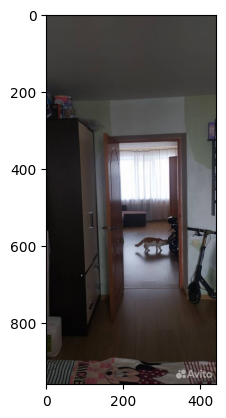

In [19]:
show_image(17487531178)

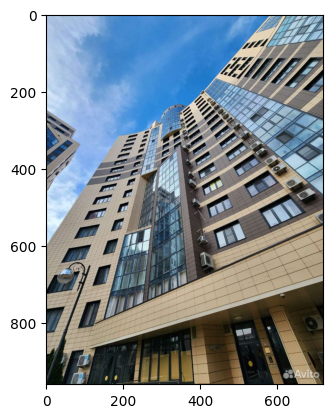

In [20]:
show_image(15996180507)

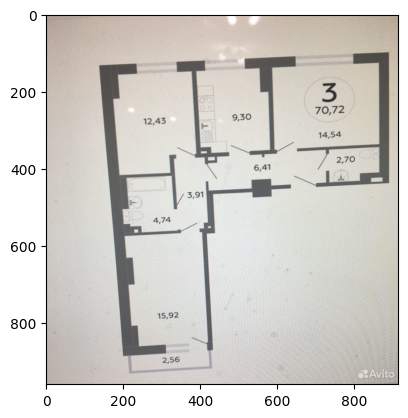

In [21]:
show_image(11759622380)

Косметический

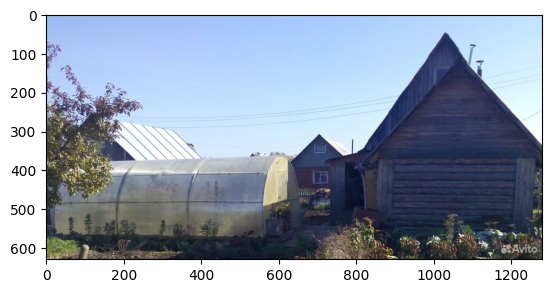

In [22]:
show_image(11928551536)

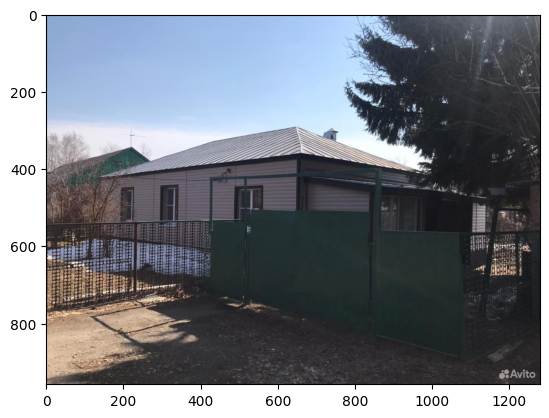

In [23]:
show_image(10901169565)

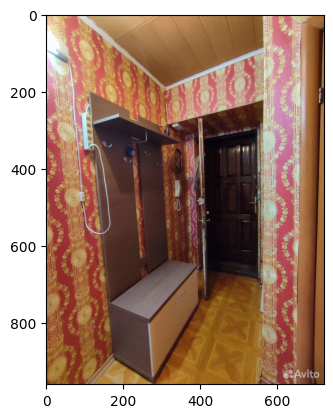

In [24]:
show_image(13567389635)

Евро

In [25]:
df.loc[mask_image_id & (df['attr_value_name'] == 'evro'), ['image_id', 'attr_value_name']].sample(10, random_state=RANDOM_STATE)

image_id attr_value_name
20422  14094221037            evro
59777  17284916502            evro
53623  16659684737            evro
34632  15349096856            evro
40775  16221642329            evro
14302  14283415520            evro
7668   13182478617            evro
20406  14016747893            evro
45568  16800648606            evro
28164  17179430797            evro

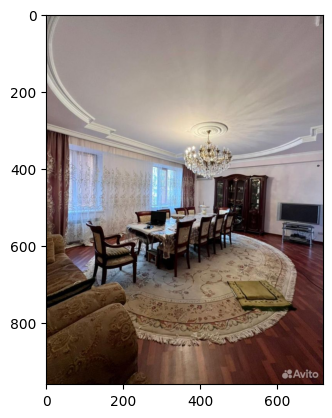

In [26]:
show_image(14094221037)

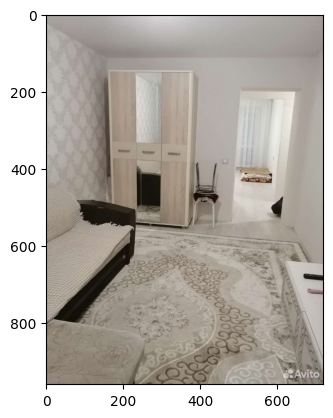

In [27]:
show_image(17284916502)

Дизайнерский

In [28]:
df.loc[mask_image_id & (df['attr_value_name'] == 'dizainerskii'), ['image_id', 'attr_value_name']].sample(10, random_state=RANDOM_STATE)

image_id attr_value_name
33488  16794209647    dizainerskii
30649  16150863371    dizainerskii
3118   14456225501    dizainerskii
12034  14455554425    dizainerskii
50211  16416914271    dizainerskii
42587  15855658256    dizainerskii
57347  14975046330    dizainerskii
34907  17118853394    dizainerskii
39535  16882778227    dizainerskii
25216  12335486028    dizainerskii

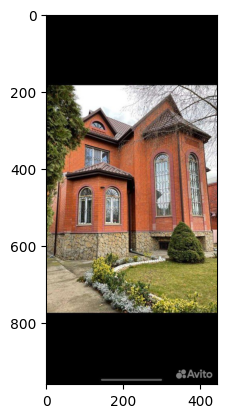

In [29]:
show_image(16794209647)

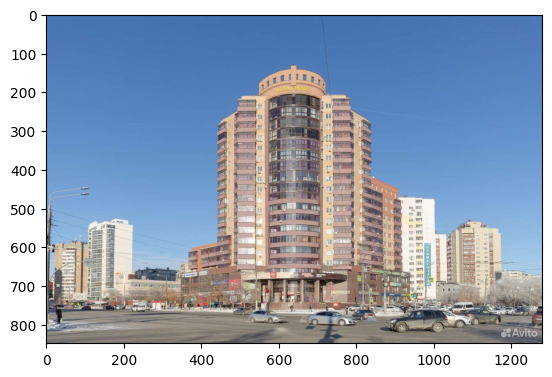

In [30]:
show_image(16150863371)

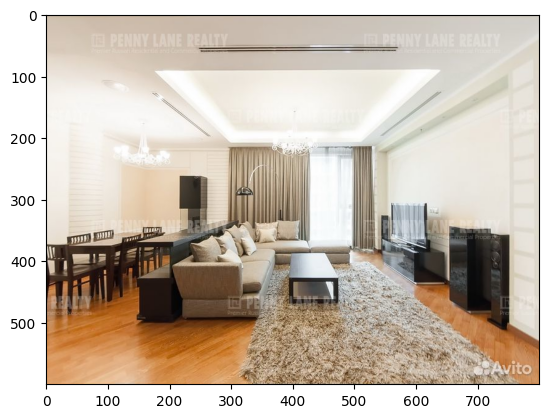

In [31]:
show_image(14456225501)

Только главного фото недостаточно – во многих случаях по нему вообще невозможно определить тип ремонта